# General

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..\\..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import civilpy

### Units in CivilPy are handled by the "pint" package, more examples of it's use can be found in the [documentation](https://pint.readthedocs.io/en/stable/).

### Kinetic Energy

In [3]:
v = 27000 * (civilpy.unit.ft / civilpy.unit.sec)
m = 4000 * civilpy.unit.lb
kinetic = civilpy.general.kinetic_energy(m, v)
kinetic.to_compact()

print(f'{round(kinetic, 3):.2E}')

4.53E+10 foot * pound


### Potential Energy

In [4]:
m = 2 * civilpy.unit.kg
z = 0.4 * civilpy.unit.m
potential = civilpy.general.potential_energy(m, z, system='metric')
potential.ito(civilpy.unit.joule)

print(f'{round(potential, 3)}')

7.848 joule


### Weight/Force Calculation

In [5]:
m = 10 * civilpy.unit.kg
weight = civilpy.general.mass_to_weight(m, system='metric')
weight.ito(civilpy.unit.newton)

print(f'{round(weight, 1)}')

98.1 newton


### Note: civilpy.general.math.solver is just the "sympy" package, more examples of it's use can be found in the [documentation](https://www.sympy.org/en/index.html).

### Quadratic Equation

In [6]:
x = civilpy.general.solver.symbols('x')
eq = 2*x**2 - 7*x + 3
solution = civilpy.general.equation_solver(eq, 'x')
solution

[1/2, 3]

### Polynomial Equations

In [7]:
eq = 2*x**4 - 2*x**3 - 14*x**2 + 2*x + 12

solution = civilpy.general.equation_solver(eq, 'x')
solution

[-2, -1, 1, 3]

### Exponential Equations

In [8]:
t = civilpy.general.solver.symbols('t')

eq = civilpy.general.solver.exp(-0.005*t) - 0.07
solution = civilpy.general.equation_solver(eq, 't')[0]
print(f'{solution:.0f}')

532


### Partial Fraction Decomposition

In [9]:
f = (x**2 + 2*x + 3)/(x**4 + x**3 + 2*x**2)

temp = civilpy.general.solver.apart(f)
temp = civilpy.general.solver.together(temp)
temp = civilpy.general.solver.numer(f) / civilpy.general.solver.expand(civilpy.general.solver.denom(f))
temp = civilpy.general.solver.factor(temp)

temp

(x**2 + 2*x + 3)/(x**2*(x**2 + x + 2))

In [10]:
civilpy.general.solver.var('A:D')

p1 = A/x
p2 = B/x**2
p3 = (C + D*x)/(x**2 + x + 2)

eqs = p1, p2, p3

h = sum(eqs)

rational_function = civilpy.general.solver.together(h)

temp = civilpy.general.solver.factor(rational_function, x)

civilpy.general.solver.Eq(temp, f)

Eq((2*B + x**3*(A + D) + x**2*(A + B + C) + x*(2*A + B))/(x**2*(x**2 + x + 2)), (x**2 + 2*x + 3)/(x**4 + x**3 + 2*x**2))

In [11]:
eq = civilpy.general.solver.Eq(civilpy.general.solver.numer(_.lhs), civilpy.general.solver.numer(_.rhs))
solution = civilpy.general.solver.solve_undetermined_coeffs(eq, [A, B, C, D], x)

solution

{A: 1/4, B: 3/2, C: -3/4, D: -1/4}

### Simultaneous Linear Equations

In [12]:
y = civilpy.general.solver.symbols('y')
p1 = 2*x + 3*y - 12
p2 = 3*x + 4*y - 8

eqs = p1, p2

solution = civilpy.general.solver.solve(eqs, [x, y])

solution

{x: -24, y: 20}

### Limits

$ \lim_{x \to 3} \frac{x^3 - 27}{x^2 - 9} $

In [13]:
eq = (x**3 - 27) / (x**2 - 9)
limit_expr = civilpy.general.solver.limit(eq, x, 3)
print(limit_expr)

9/2


$ \lim_{x \to \infty} \frac{3x - 2}{4x + 3} $

In [14]:
eq = (3*x - 2) / (4*x + 3)
inf = civilpy.general.inf

limit_expr = civilpy.general.solver.limit(eq, x, inf)
print(limit_expr)

3/4


$ \lim_{x \to 2} \frac{x^2 + x - 6}{x^2 - 3x + 2} $

In [15]:
eq = (x**2 + x - 6) / (x**2 - 3*x + 2)
limit_expr = civilpy.general.solver.limit(eq, x, 2)
print(limit_expr)

5


### Sequence and Progressions

$ \lim_{n \to \infty} \frac{e^n}{n} $

In [16]:
n = civilpy.general.solver.symbols('n')
eq = (civilpy.general.solver.exp(n)) / (n)
limit_expr = civilpy.general.solver.limit(eq, n, inf)
print(limit_expr)

oo


In [17]:
# Apply L'Hopital's Rule
eq = (civilpy.general.solver.exp(n)) / (1)
limit_expr = civilpy.general.solver.limit(eq, n, inf)
print(limit_expr)

oo


### Arithmetic Growth Rate

In [18]:
p_0 = 1000
R = 10
T = 5

solution = civilpy.general.arithmetic_growth(p_0, R, T)
solution

1050

### Geometric Growth Rate

In [19]:
p_0 = 245000
R = 0.03
T = 6

solution = civilpy.general.geometric_growth(p_0, R, T)
solution

292542.81264960504

### Matrix Math (array is just numpy.array)

In [20]:
x = civilpy.general.np.array([3,2])
y = civilpy.general.np.array([5,1])
z = x + y
z

array([8, 3])

### Determinate of a Matrix

In [21]:
np = civilpy.general.np
A = np.array([[2, 3, -4], [3, -1, -2], [4, -7, -6]])
print(round(np.linalg.det(A),0))

82.0


### Matrix Multiplication

In [22]:
A = np.array([[1, 4, 3], [5, 2, 6]])
B = np.array([[7, 12], [11, 8], [9, 10]])

C = np.matmul(A, B)
C

array([[ 78,  74],
       [111, 136]])

### Transposing Matrix

In [23]:
A = np.array([[1, 6, 9], [2, 3, 4], [7, 1, 5]])
A_trans = np.matrix.transpose(A)
A_trans

array([[1, 2, 7],
       [6, 3, 1],
       [9, 4, 5]])

### Matrix Rank

In [24]:
A = np.array([[7, 4, 9, 1], [0, 2, -5, 3], [0, 4, -10, 6]])
rank = np.linalg.matrix_rank(A)
rank

2

### Classical Adjoint

In [25]:
A = np.array([[2, 3, -4], [0, -4, 2], [1, -1, 5]])

adjoint = np.matrix.transpose(np.linalg.inv(A).T * np.linalg.det(A))
adjoint

array([[-18., -11., -10.],
       [  2.,  14.,  -4.],
       [  4.,   5.,  -8.]])

### Matrix Inverse

In [26]:
A = np.array([[4, 5], [2, 3]])

A_inverse = np.linalg.inv(A)
A_inverse

array([[ 1.5, -2.5],
       [-1. ,  2. ]])

In [27]:
identity = np.matmul(A, A_inverse)
identity

array([[1., 0.],
       [0., 1.]])

### Simultaneous Linear Equations in Matrix Form

$ a_{11}x_1 + a_{12}x_2 = b_1 $

$ a_{21}x_1 + a_{22}x_2 = b_2 $

In [28]:
A = np.array([['a11', 'a12'],['a21', 'a22']])
X = np.array([['x1'], ['x2']])
B = np.array([['b1'], ['b2']])

print(A)
print(X)
print(B)

[['a11' 'a12']
 ['a21' 'a22']]
[['x1']
 ['x2']]
[['b1']
 ['b2']]


### Solving Linear Equations

$ 2x + 3y - 4z = 1 $

$ 3x - y - 2z = 4 $

$ 4x - 7y - 6z = -7 $

In [29]:
A = np.array([[2, 3, -4], [3, -1, -2], [4, -7, -6]])
B = np.array([[1], [4], [-7]])

X = np.linalg.solve(A, B)
print(X)

[[3.]
 [1.]
 [2.]]


### Eigenvalues and Eigenvectors

In [30]:
A = civilpy.general.solver.Matrix([[2, 4], [6, 4]])

eigenvalues = A.eigenvals()
eigenvectors = A.eigenvects(simplify=True)

print('Eigenvalues:')
for count, key in enumerate(eigenvalues):
    print(f'{count+1}: {key}')

print('\nEigenvectors:')
for value in eigenvectors:
    print(f'\n {value[2][0]}')

Eigenvalues:
1: 8
2: -2

Eigenvectors:

 Matrix([[-1], [1]])

 Matrix([[2], [3]])


### Vectors

Angle between 2 vectors

In [31]:
v_1 = [-np.sqrt(3), 1]
v_2 = [2*np.sqrt(3), 2]

unit_vect_1 = v_1 / np.linalg.norm(v_1)
unit_vect_2 = v_2 / np.linalg.norm(v_2)
dot_product = np.dot(unit_vect_1, unit_vect_2)
angle = np.arccos(dot_product)

print(round(np.degrees(angle), 0))

120.0


Find vector orthogonal to two vectors

In [32]:
v_1 = np.array([1, -1, 2])
v_2 = np.array([0, 3, -1])

solution = np.cross(v_1, v_2)
vector_length = np.linalg.norm(solution)
unit_vector = solution / vector_length

unit_vector

array([-0.84515425,  0.16903085,  0.50709255])

### Analytic Geometry

In [33]:
unit = civilpy.unit
d = 2 * unit.inch
dia = 2 * unit.inch
radius = civilpy.water_resources.hydraulic_radius(depth=d, dia=dia)
print(round(radius, 2))

0.5 inch


In [34]:
radius = civilpy.water_resources.hydraulic_radius(depth=1.8 * unit.meter, b1=6.1 * unit.meter, shape='rectangle')
round(radius, 2)

1.13 <Unit('meter')>

In [35]:
radius = civilpy.water_resources.hydraulic_radius(depth=1.8 * unit.meter, slope=2, b1=6.1 * unit.meter, shape='trapezoid')
round(radius, 2)

1.23 <Unit('meter')>

In [36]:
radius = civilpy.water_resources.hydraulic_radius(depth=1.8 * unit.meter, slope=0.577, shape='triangle')
round(radius, 2)

0.45 <Unit('meter')>

### Plotting an implicit equation

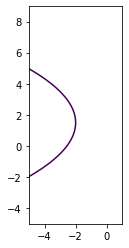

In [37]:
import matplotlib.pyplot
from numpy import arange
from numpy import meshgrid

delta = 0.025
xrange = arange(-5.0, 1, delta)
yrange = arange(-5.0, 9.0, delta)
X, Y = meshgrid(xrange,yrange)

# F is one side of the equation, G is the other
F = 4*Y**2 - 12*Y + 16*X + 41
G = 0

plt = matplotlib.pyplot.contour(X, Y, (F - G), [0])
plt.axes.set_aspect('equal')
matplotlib.pyplot.show()

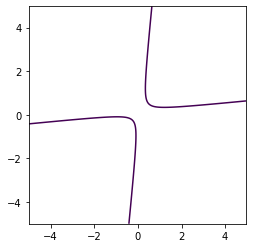

In [38]:
delta = 0.025
xrange = arange(-5.0, 5, delta)
yrange = arange(-5.0, 5.0, delta)
X, Y = meshgrid(xrange,yrange)

# F is one side of the equation, G is the other
F = X**2 - 10*X*Y + Y**2 + X + Y + 1
G = 0

plt = matplotlib.pyplot.contour(X, Y, (F - G), [0])
plt.axes.set_aspect('equal')
matplotlib.pyplot.show()

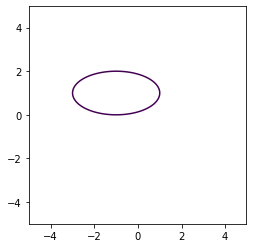

In [39]:
delta = 0.025
xrange = arange(-5.0, 5, delta)
yrange = arange(-5.0, 5.0, delta)
X, Y = meshgrid(xrange,yrange)

# F is one side of the equation, G is the other
F = X**2 + 4*Y**2 + 2*X - 8*Y + 1
G = 0

plt = matplotlib.pyplot.contour(X, Y, (F - G), [0])
plt.axes.set_aspect('equal')
matplotlib.pyplot.show()

### Plotting with sympy for when matplotlib fails

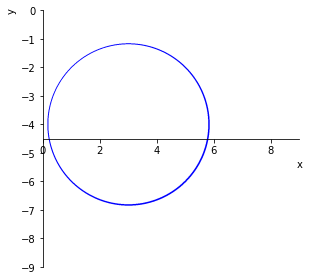

In [40]:
from sympy import symbols, plot_implicit, Eq
x, y = symbols('x y')
plot_implicit(Eq(x**2 + y**2 - 6*x + 8*y + 20, 3), (x, 0, 9), (y, -9, 0), aspect_ratio=[1,1])


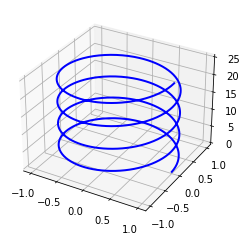

In [41]:
import matplotlib.pyplot as plt

n = 1000
r = 1
k = 1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot a helix along the x-axis
theta_max = 8 * np.pi
theta = np.linspace(0, theta_max, n)
x = r * np.cos(theta)
y = r * np.sin(theta)
z = k * theta
ax.plot(x, y, z, 'b', lw=2)

matplotlib.pyplot.show()

### Differential Calculus

In [42]:
sym = civilpy.general.solver
x = sym.Symbol('x')
sym.diff(x**5)

5*x**4

slope @ x = 3 of curve $f(x) = x^3 - 2x$

In [43]:
f_prime = sym.diff(x**3 - 2*x)
f_prime.subs(x, 3)

25

In [44]:
f = 5*x**(5/3)
f_prime = sym.diff(f)
f_prime

8.33333333333333*x**0.666666666666667

In [45]:
f = sym.sin(x) * sym.cos(x) ** 2
f_prime = sym.diff(f)
f_prime

-2*sin(x)**2*cos(x) + cos(x)**3

In [46]:
f = sym.ln(sym.cos(sym.exp(x)))
f_prime = sym.diff(f)
sym.simplify(f_prime)

-exp(x)*tan(exp(x))

Find the global extrema of $ f(x) = x^3 + x^2 - x + 1 $on the interval \[-2, +2\]

In [47]:
f = x**3 + x**2 - x + 1
x1 = -2
x2 = 2
x1, x2, dict1 = civilpy.general.find_global_extrema_order_3(f, x1, x2)

The first derivative is 
3*x**2 + 2*x - 1 the second is 
 6*x + 2

The first root is -1, the second root is 1/3

-1 is a local maximum

1/3 is a local minimum

The inflection point is -1/3

Global min: -2, Global max: 2


### Derivatives of parametric equations

In [48]:
x, y, t = sym.symbols('x y t')
f1 = 5 * sym.cos(t) - x
f2 = 5 * sym.sin(t) - y

dx_dt = sym.diff(f1, t)
dy_dt = sym.diff(f2, t)

dy_dx = dy_dt / dx_dt
sym.simplify(dy_dx)

-1/tan(t)

### Partial derivative

In [49]:
x, y, z = sym.symbols('x y z')
f = 3*x**2 - 6*y**2 + x*y + 5*y - 9
dz_dx = sym.diff(f, x)
dz_dx

6*x + y

### Implicit Differentiation

In [50]:
f = x**2 + x*y + y**3

df_dx = sym.diff(f, x)
df_dy = sym.diff(f, y)
dy_dx = -df_dx / df_dy
dy_dx

(-2*x - y)/(x + 3*y**2)

In [51]:
f = x**2 + y**2 + z**2 - 9
df_dx = sym.diff(f, x)
df_dz = sym.diff(f, z)
dz_dx = - df_dx / df_dz

result = dz_dx.subs(x, 1).subs(y, 2).subs(z, 2)
result

-1/2

### Integration

In [52]:
f = (2*x**2 + 3)**2 / x
integral = sym.integrate(f, x)
integral

x**4 + 6*x**2 + 9*log(x)

In [53]:
f = (3*x + 2) / (3*x - 2)
integral = sym.integrate(f, x)
integral

x + 4*log(3*x - 2)/3

In [54]:
f = x**2 * sym.exp(x) * sym.cos(x)
integral = sym.integrate(f, x)
integral

x**2*exp(x)*sin(x)/2 + x**2*exp(x)*cos(x)/2 - x*exp(x)*sin(x) + exp(x)*sin(x)/2 - exp(x)*cos(x)/2

In [55]:
f = sym.sin(x) * sym.cos(x)
integral = sym.integrate(f, x)
integral

sin(x)**2/2

In [56]:
f = x**2 + (y**3)*x
integral = sym.integrate(f, x)
d_integral = sym.integrate(integral, y)
d_integral

x**3*y/3 + x**2*y**4/8

### Definite Integral

In [57]:
f = sym.sin(x)
# first value = bottom value in eq.
solution = sym.integrate(f, (x, sym.pi / 4, sym.pi / 3))
round(solution.evalf(), 3)

0.207

In [58]:
f = x ** 2
integral = sym.integrate(f, (x, 0, 4))
integral

64/3